In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import scipy.special
#from scipy.stats import beta as B
from scipy.stats import beta 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

# Group 1: Non-Vaccinated 

## Goal: Find Prior Transition Distribution from Infected to Symptomatic Compartment for Alpha variant

### Both Israel and Italy studies prove that the transition probability of Alpha variant from infected to symptomatic is around 0.36.

In [3]:
x = [0.26, 0.31, 0.36, 0.41, 0.46]

In [4]:
a, b = 10, 20
alpha_a = np.linspace(0.001, 200, a)
beta_b = np.linspace(0.001,200, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

In [5]:
def calc_loss(alpha, beta, probs):
    CDFS = scipy.stats.beta.cdf(x, alpha, beta)
    error_p02 = 0.1 * np.square(0.02 - CDFS[0])
    error_p20 = 0.2 * np.square(0.20 - CDFS[1])
    error_p50 = 0.4 * np.square(0.50- CDFS[2])
    error_p80 = 0.2 * np.square(0.80 - CDFS[3])
    error_p98 = 0.1 * np.square(0.98 - CDFS[4])
    error = error_p02 + error_p20 + error_p50 + error_p80 + error_p98
    return error

In [6]:
cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);

In [7]:
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
pd.DataFrame(best_param)

,bestAlpha,bestBeta,bestCost
0,22.223111,42.106053,0.006839


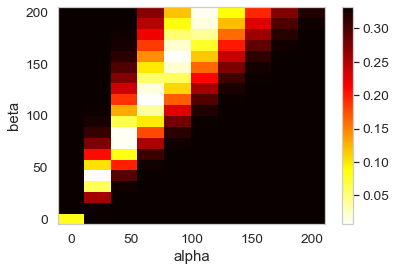

In [8]:
plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

In [9]:
a, b = 20, 20
alpha_a = np.linspace(0.001, 30, a)
beta_b = np.linspace(0.001,50, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
pd.DataFrame(best_param)

,bestAlpha,bestBeta,bestCost
0,25.263316,44.736947,0.000115


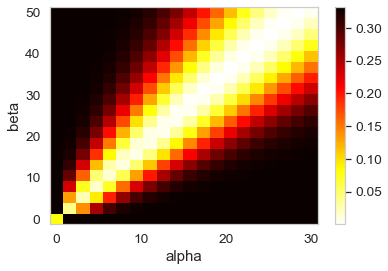

In [10]:
plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha   bestBeta  bestCost
0  25.263316  44.736947  0.000115


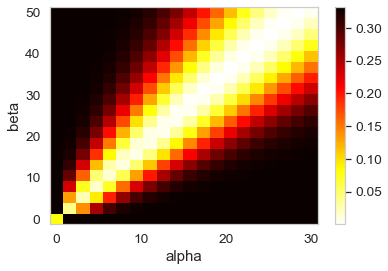

In [11]:
a, b = 20, 20
alpha_a = np.linspace(0.001, 30, a)
beta_b = np.linspace(0.001,50, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha   bestBeta  bestCost
0  25.263158  44.736842  0.000115


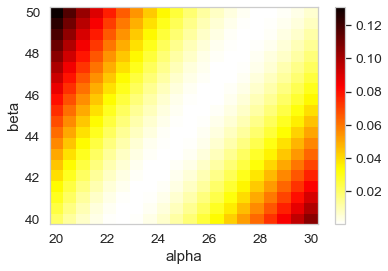

In [12]:
a, b = 20, 20
alpha_a = np.linspace(20, 30, a)
beta_b = np.linspace(40,50, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

## Check the distribution achieves

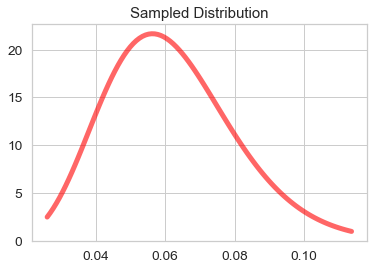

In [41]:
fig, ax = plt.subplots(1, 1)

a, b = bestAlpha, bestBeta
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
ax.title.set_text('Sampled Distribution')

# Goal: Find Prior Transition Distribution from Symptomatic to Hospitalization Compartment for Alpha variant

### The transition probability of Alpha variant from symptomatic to hospitalization is around 0.13 from the Israel study, and using the same strategy, we have a 20-80 coverage interval (0.08, 0.18) and a 2-98 coverage interval  (0.03, 0.23).

In [14]:
x = [0.03, 0.08, 0.13, 0.18, 0.23]

   bestAlpha    bestBeta  bestCost
0  15.790421  110.526947  0.013216


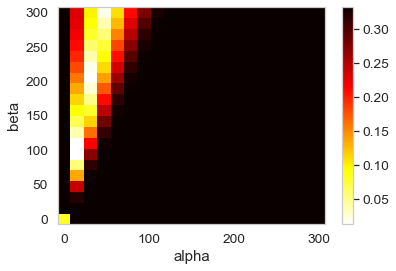

In [15]:
a, b = 20, 20
alpha_a = np.linspace(0.001, 300, a)
beta_b = np.linspace(0.001,300, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha   bestBeta  bestCost
0   5.264105  31.579842  0.002627


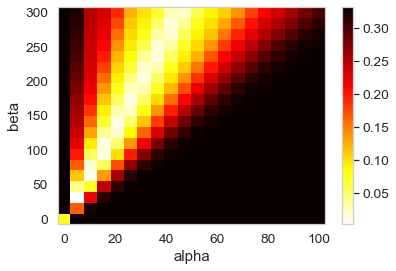

In [16]:
a, b = 20, 20
alpha_a = np.linspace(0.001, 100, a)
beta_b = np.linspace(0.001,300, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha   bestBeta  bestCost
0   4.211105  26.316526  0.000692


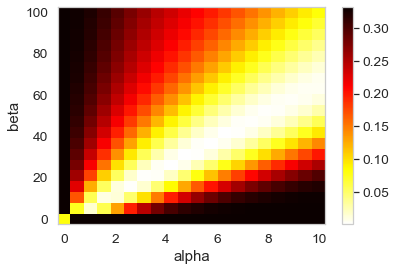

In [17]:
a, b = 20, 20
alpha_a = np.linspace(0.001, 10, a)
beta_b = np.linspace(0.001,100, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0    4.48331  28.62069  0.000495


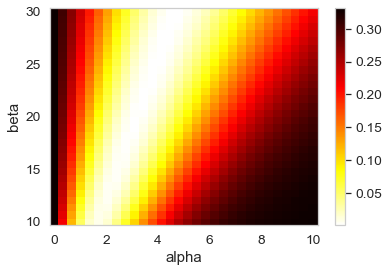

In [18]:
a, b = 30, 30
alpha_a = np.linspace(0.001, 10, a)
beta_b = np.linspace(10,30, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0    4.48331  28.62069  0.000495


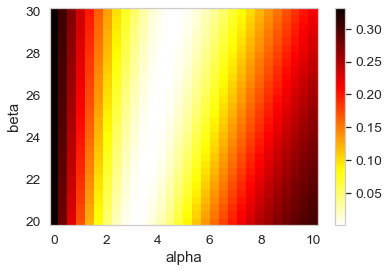

In [19]:
a, b = 30, 30
alpha_a = np.linspace(0.001, 10, a)
beta_b = np.linspace(20,30, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

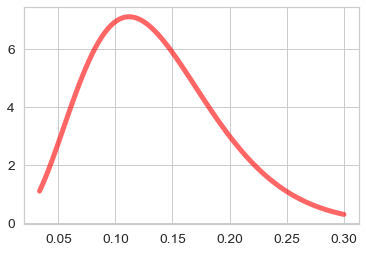

In [20]:
fig, ax = plt.subplots(1, 1)

a, b = bestAlpha, bestBeta
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')

# Goal: Find Prior Transition Distribution from Infected to Symptomatic Compartment for Delta variant

### The Italy study says the transition probability of Delta variant from infected to symptomatic is about 60%.

In [21]:
x = [0.4, 0.42, 0.6, 0.78, 0.8]

   bestAlpha   bestBeta  bestCost
0  13.794034  10.345793  0.014948


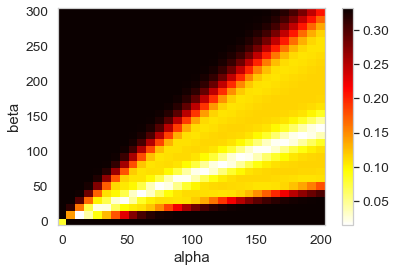

In [22]:
a, b = 30, 30
alpha_a = np.linspace(0.001, 200, a)
beta_b = np.linspace(0.001,300, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0   5.068966  3.531034  0.003412


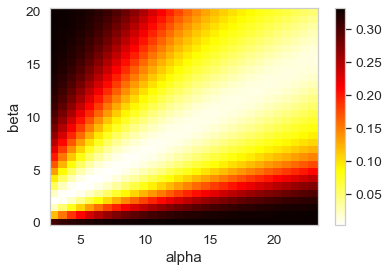

In [23]:
a, b = 30, 30
alpha_a = np.linspace(3, 23, a)
beta_b = np.linspace(0.1,20, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0    4.87931  3.344828  0.003223


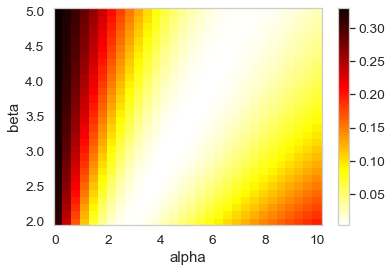

In [24]:
a, b = 30, 30
alpha_a = np.linspace(0.1, 10, a)
beta_b = np.linspace(2,5, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0   4.586207  3.137931  0.003186


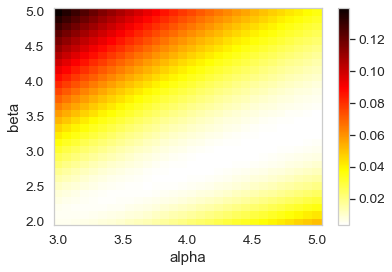

In [25]:
a, b = 30, 30
alpha_a = np.linspace(3, 5, a)
beta_b = np.linspace(2,5, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

# Goal: Find Prior Transition Distribution from Symptomatic to Hospitalization Compartment for Delta variant

### We get 9% from symptomatic to hospitalization for the Delta variant. Add some uncertainty in each side for the CIs, we have (0.04, 0.14) for 20-80% CI, and (0.001, 0.19) for 2-98% CI.

In [26]:
x = [0.01, 0.02, 0.09, 0.16, 0.17]

   bestAlpha   bestBeta  bestCost
0   6.993103  69.031034  0.013672


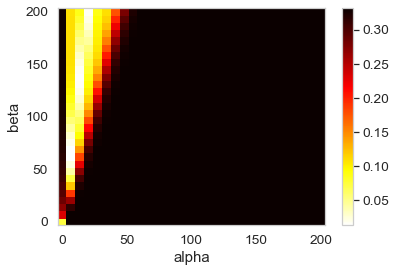

In [27]:
a, b = 30, 30
alpha_a = np.linspace(0.1, 200, a)
beta_b = np.linspace(0.1,200, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha   bestBeta  bestCost
0   1.472414  14.655172  0.006428


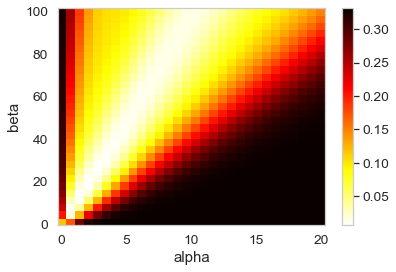

In [28]:
a, b = 30, 30
alpha_a = np.linspace(0.1, 20, a)
beta_b = np.linspace(1,100, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0   1.124138  9.241379  0.005366


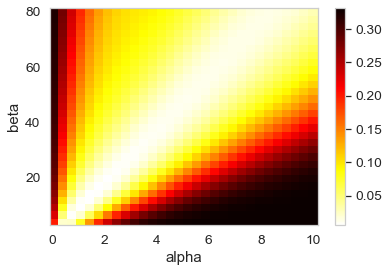

In [29]:
a, b = 30, 30
alpha_a = np.linspace(0.1, 10, a)
beta_b = np.linspace(4,80, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0        1.1  9.689655  0.005033


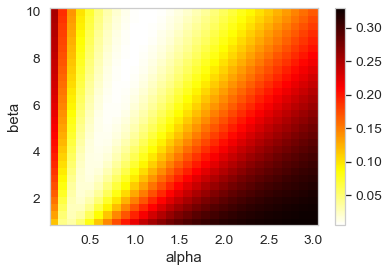

In [30]:
a, b = 30, 30
alpha_a = np.linspace(0.1, 3, a)
beta_b = np.linspace(1,10, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

# Group 2: Vaccinated

### Both Israel and Italy studies prove that the transition probability of Alpha variant from infected to symptomatic is around 0.25 for Alpha variant. 

In [31]:
x = [0.15, 0.20, 0.25, 0.30, 0.35]

   bestAlpha   bestBeta  bestCost
0  10.527263  31.579789  0.000935


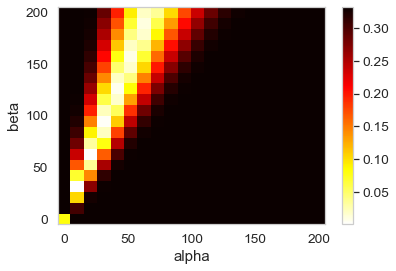

In [32]:
a, b = 20, 20
alpha_a = np.linspace(0.001, 200, a)
beta_b = np.linspace(0.001,200, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0  11.842105      35.0  0.000393


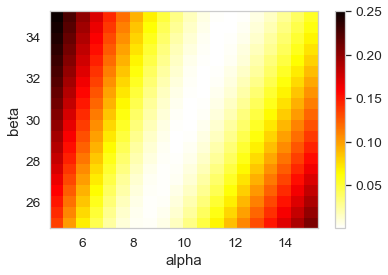

In [33]:
a, b = 20, 20
alpha_a = np.linspace(5, 15, a)
beta_b = np.linspace(25,35, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0  12.105263      36.0  0.000342


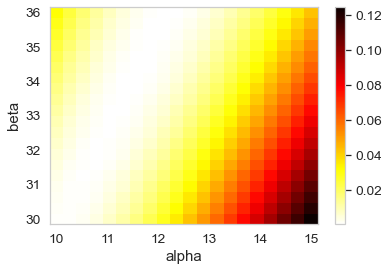

In [34]:
a, b = 20, 20
alpha_a = np.linspace(10, 15, a)
beta_b = np.linspace(30,36, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

### The Spain study indicates a 0.06 transition probability from symptomatic to hospitalization stage for Alpha varinat. 

In [35]:
x = [0.001, 0.01, 0.06, 0.11, 0.16]

   bestAlpha    bestBeta  bestCost
0  10.527263  157.894947  0.015148


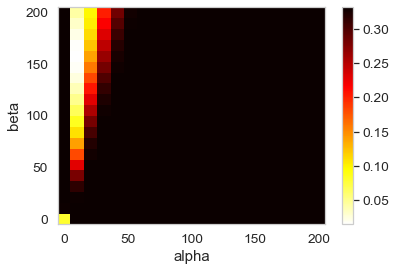

In [36]:
a, b = 20, 20
alpha_a = np.linspace(0.001, 200, a)
beta_b = np.linspace(0.001,200, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha    bestBeta  bestCost
0       10.0  150.526316  0.014973


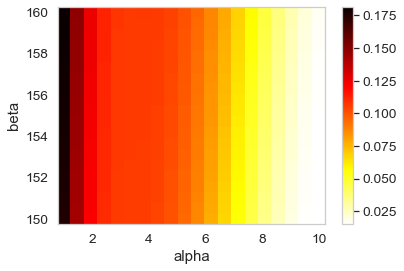

In [37]:
a, b = 20, 20
alpha_a = np.linspace(1, 10, a)
beta_b = np.linspace(150,160, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0   9.894737     150.0  0.014976


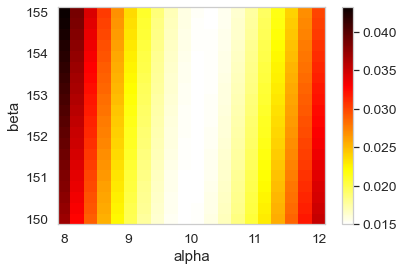

In [38]:
a, b = 20, 20
alpha_a = np.linspace(8, 12, a)
beta_b = np.linspace(150,155, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

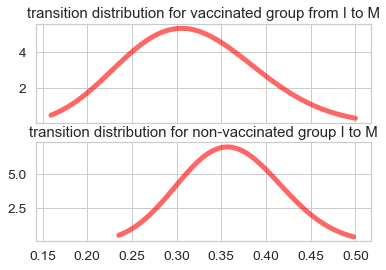

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

a, b = 12, 26
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax1.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
ax1.title.set_text('transition distribution for vaccinated group from I to M')
a, b =25.26, 44.73
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax2.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
ax2.title.set_text('transition distribution for non-vaccinated group I to M')

plt.savefig('comp_transition_IM.png')

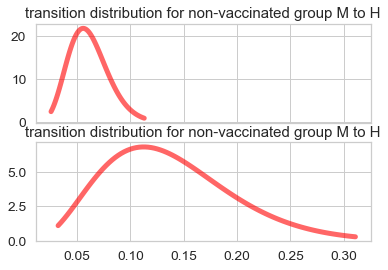

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

a, b = 9.8, 150
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax1.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
ax1.title.set_text('transition distribution for non-vaccinated group M to H')
a, b =4.21, 26.32
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax2.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
ax2.title.set_text('transition distribution for non-vaccinated group M to H')

plt.savefig('comp_transition_MH.png')